In [3]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


# Dataset Overview 

In [4]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


date            0
region          0
age             0
income          5
transactions    0
spend           3
dtype: int64

# Distributional plots 

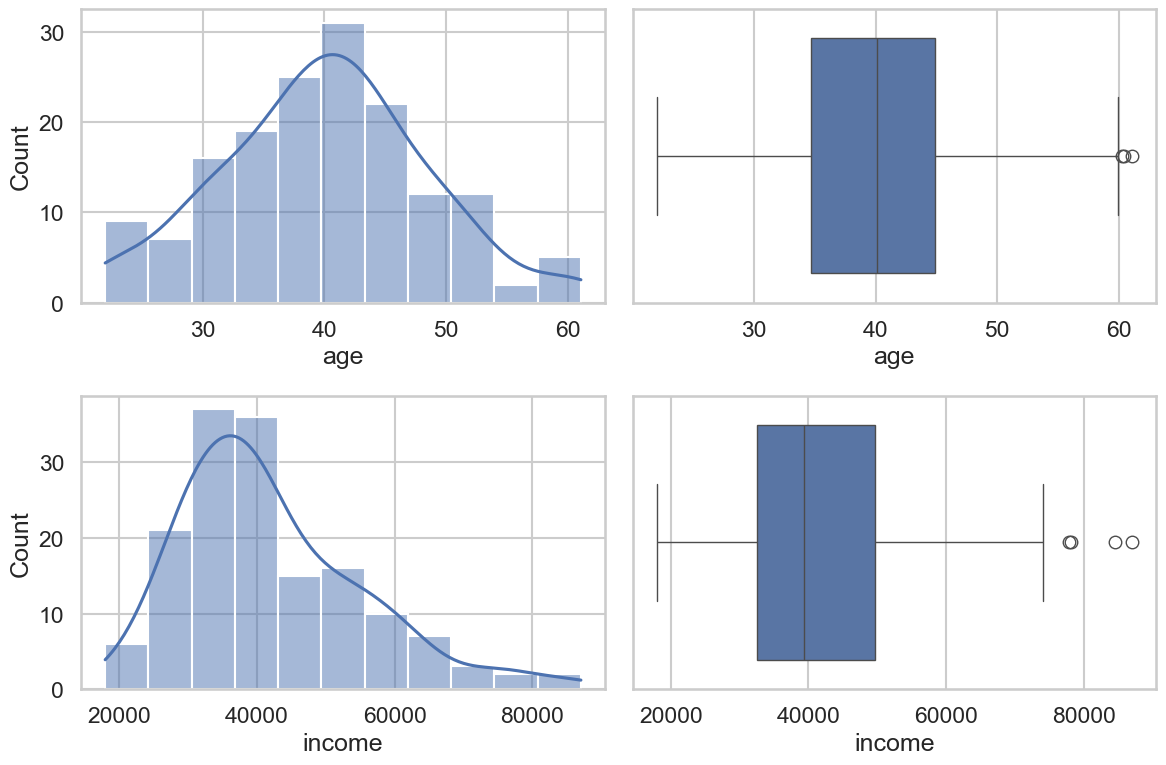

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(df['age'], kde=True, ax=axs[0,0])
sns.boxplot(x=df['age'], ax=axs[0,1])
sns.histplot(df['income'], kde=True, ax=axs[1,0])
sns.boxplot(x=df['income'], ax=axs[1,1])
plt.tight_layout()
plt.show()


# Bivariate relationships 

<Axes: xlabel='income', ylabel='spend'>

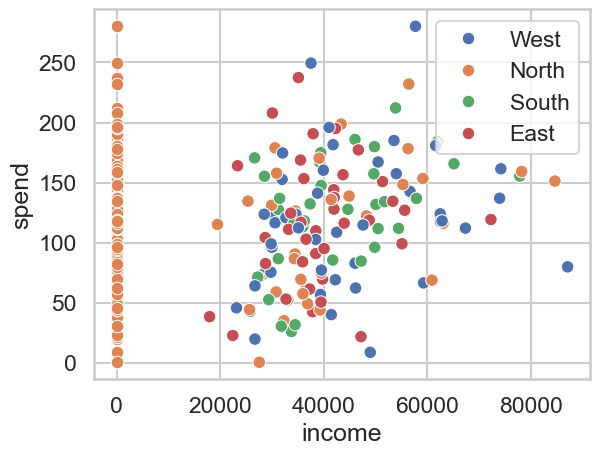

In [6]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
sns.scatterplot(data=df, x='transactions', y='spend')


# Correlation Heatmap

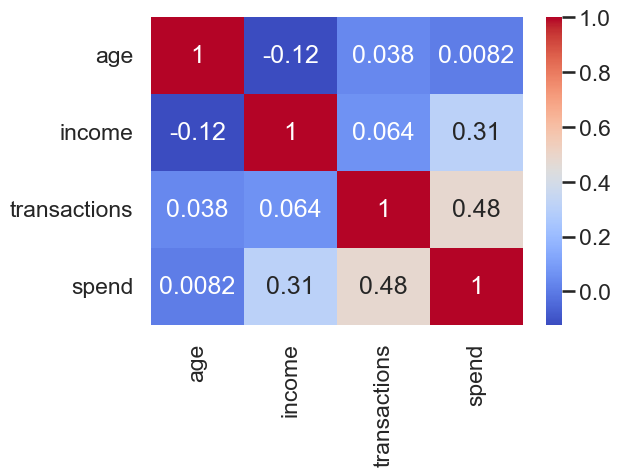

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


## Findings from Correlation Analysis

- **Age vs. Income:** Weak negative correlation (-0.12). Older individuals tend to have slightly lower incomes in this dataset, but the effect is minimal.
- **Income vs. Spend:** Moderate positive correlation (0.31). Higher income is generally associated with more spending, which makes sense in real-world behavior.
- **Transactions vs. Spend:** Stronger positive correlation (0.48). The number of transactions is more predictive of spending than income, suggesting spending is activity-driven rather than purely wealth-driven.
- **Other Relationships:** Age has almost no relationship with spending (0.008) or transactions (0.038).

## Risks and Assumptions

- **Synthetic Data:** Relationships are generated, so they may not fully represent real-world populations. For example, the negative age–income relationship may not hold in real data.
- **Outliers & Missingness:** Some values were deliberately injected as NaN or extreme outliers. These can distort correlations if not handled.
- **Linearity Assumption:** Correlation measures only linear relationships. Non-linear effects may exist but are not captured here.

## Implications for Next Step

- **Data Cleaning:** Need to address missing values in `income` and `spend`, and check whether outliers should be capped or winsorized.
- **Feature Engineering:** Since `transactions` explains more variance in spending than `income`, features around *transaction frequency* may be more useful in predictive models.
- **Scaling:** Numeric variables have different scales (`income` in thousands vs. `transactions` in single digits). Normalization or standardization will be required before modeling.
